In [91]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
data = pd.read_csv(r"C:\Users\Hema\Desktop\ew\1\housing.csv")

In [95]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [99]:
data = data.dropna()

In [101]:
from sklearn.model_selection import train_test_split
x = data.drop(["median_house_value"] , axis = 1 )
y = data["median_house_value"]

In [103]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.15)

In [105]:
train_data = x_train.join(y_train)

In [107]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19317,-123.04,38.49,30.0,3977.0,930.0,1387.0,582.0,2.6161,NEAR OCEAN,132500.0
18829,-123.26,41.86,25.0,2344.0,532.0,1117.0,424.0,2.7222,INLAND,64600.0
8652,-118.40,33.86,18.0,5152.0,1365.0,2286.0,1243.0,5.1677,<1H OCEAN,380800.0
1630,-122.17,37.88,32.0,3633.0,508.0,1393.0,506.0,7.6917,NEAR BAY,401800.0
14179,-117.06,32.73,33.0,3444.0,619.0,1884.0,582.0,3.7891,NEAR OCEAN,126700.0
...,...,...,...,...,...,...,...,...,...,...
9198,-119.59,37.39,19.0,3273.0,611.0,1164.0,481.0,3.5446,INLAND,106500.0
17236,-119.66,34.44,26.0,2790.0,413.0,1014.0,397.0,6.5631,<1H OCEAN,500001.0
14484,-117.27,32.83,35.0,1420.0,193.0,469.0,177.0,8.0639,NEAR OCEAN,500001.0
19990,-119.32,36.19,11.0,3136.0,620.0,2013.0,583.0,3.3350,INLAND,69700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

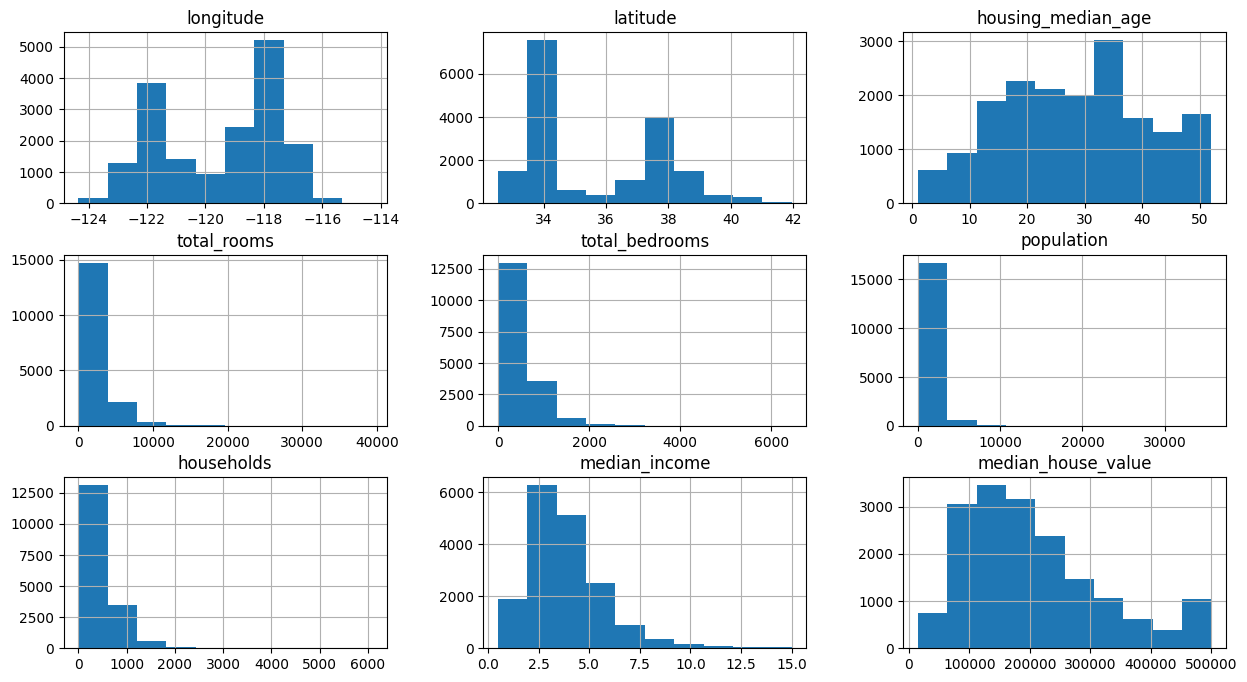

In [109]:
train_data.hist(figsize=(15,8))

<Axes: >

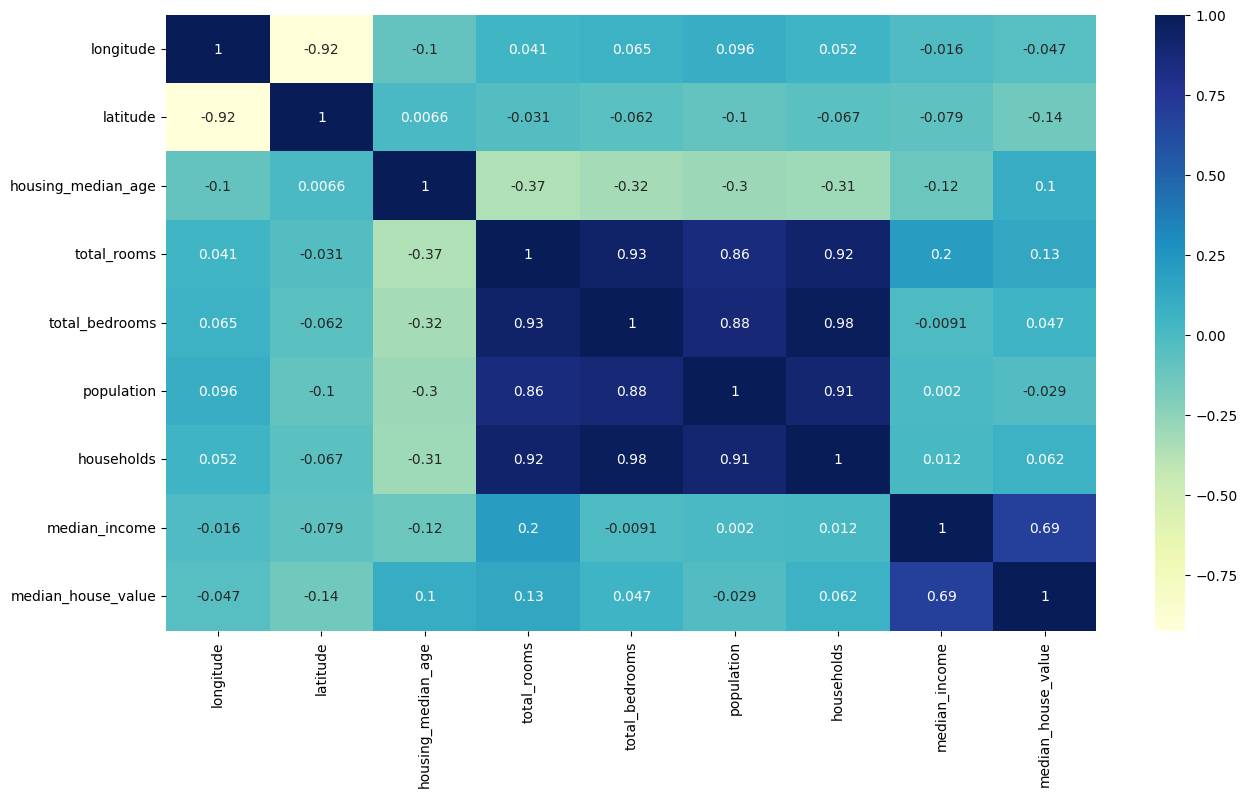

In [110]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.drop(["ocean_proximity"] , axis=1).corr(),annot=True ,cmap="YlGnBu" )

In [111]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] +1)
train_data['population'] = np.log(train_data['population'] +1)
train_data['households'] = np.log(train_data['households'] +1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] +1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

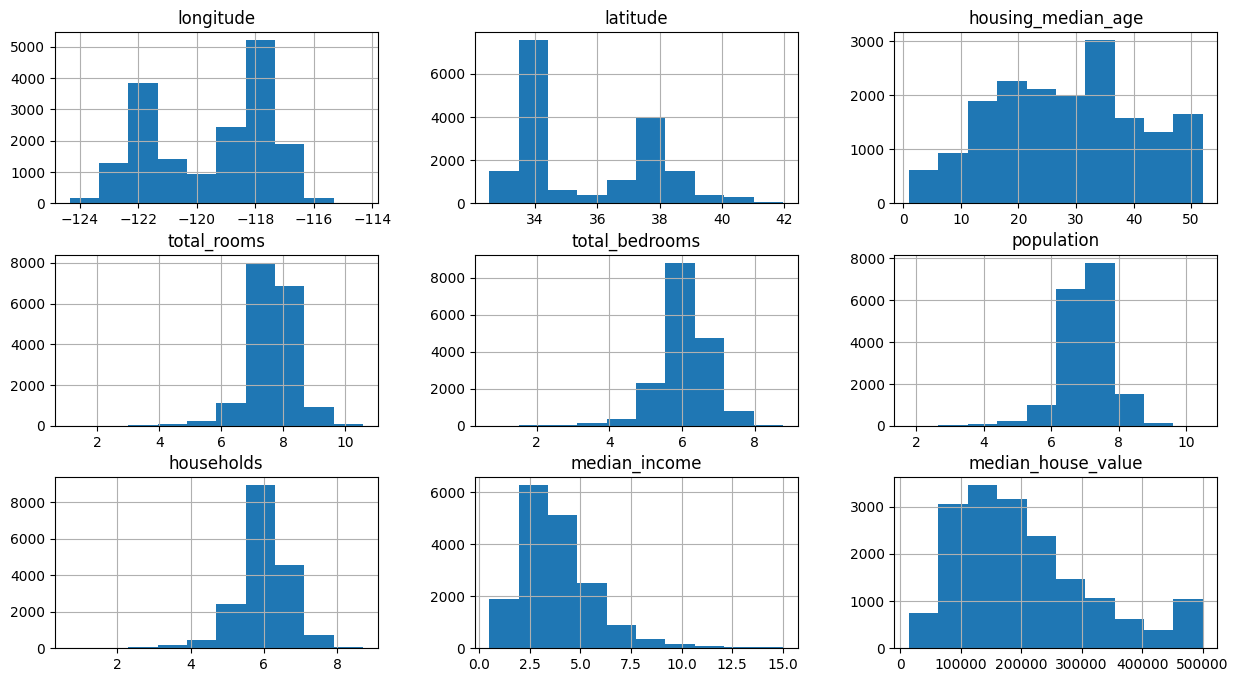

In [112]:
train_data.hist(figsize=(15,8))

In [114]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity , dtype=int)).drop(["ocean_proximity"] , axis=1)


<Axes: >

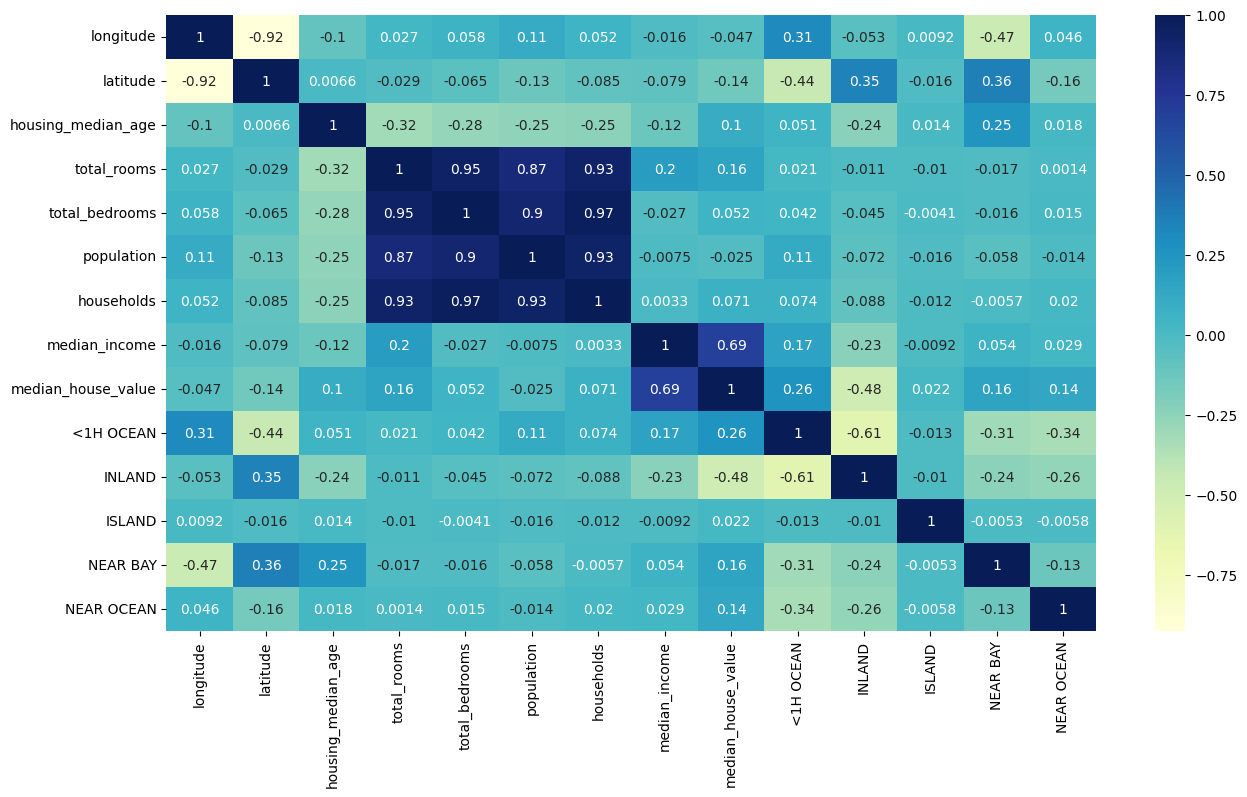

In [115]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True ,cmap="YlGnBu" )

<Axes: xlabel='latitude', ylabel='longitude'>

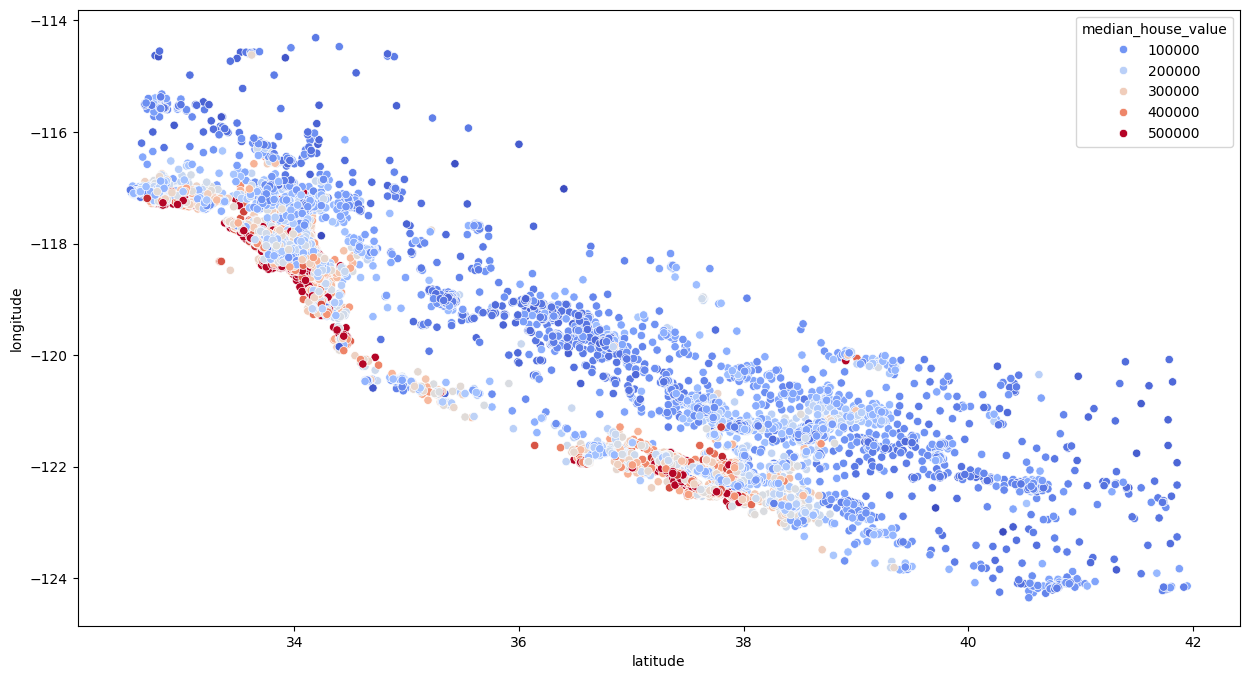

In [118]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude" , data = train_data, hue="median_house_value",palette="coolwarm")

In [124]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"]/train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

<Axes: >

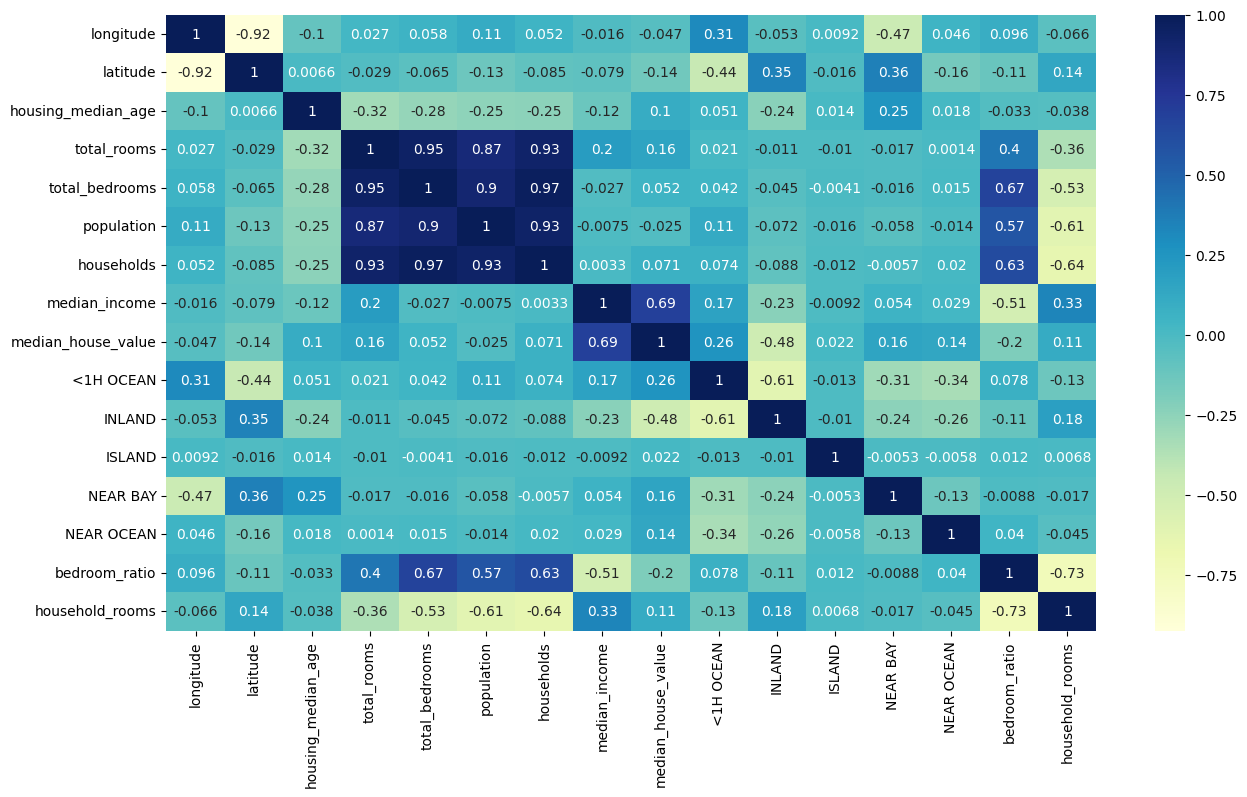

In [126]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True ,cmap="YlGnBu" )

In [129]:
from sklearn.linear_model import LinearRegression

x_train , y_train = train_data.drop(["median_house_value"],axis = 1) , train_data["median_house_value"]

reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [131]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] +1)
test_data['population'] = np.log(test_data['population'] +1)
test_data['households'] = np.log(test_data['households'] +1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] +1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity , dtype=int)).drop(["ocean_proximity"] , axis=1)
# test_data = test_data.drop(test_data["ocean_proximity"] ,axis = 1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"]/test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]

In [133]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
16284,-121.28,37.93,23.0,7.307873,5.849325,7.109879,5.840642,2.1591,67800.0,0,1,0,0,0,0.800414,1.251211
8305,-118.12,33.76,45.0,8.018296,6.248043,7.028201,6.269096,7.0796,500001.0,0,0,0,0,1,0.779223,1.279019
14582,-117.18,32.84,31.0,8.027803,6.356108,7.297768,6.309918,3.6667,175900.0,0,0,0,0,1,0.791762,1.272251
4188,-118.22,34.12,28.0,8.103797,6.933423,7.890208,6.849066,3.0919,185400.0,1,0,0,0,0,0.855577,1.183197
7055,-118.03,33.92,30.0,7.254885,5.808142,7.176255,5.755742,3.0000,158300.0,1,0,0,0,0,0.800584,1.260460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9065,-118.14,34.65,20.0,7.137278,5.308268,6.313548,5.231109,4.6591,247200.0,0,1,0,0,0,0.743738,1.364391
8368,-118.35,33.98,42.0,8.033334,6.523562,7.487734,6.413459,3.7450,170800.0,1,0,0,0,0,0.812062,1.252574
7178,-118.18,34.05,41.0,6.424869,5.283204,6.703188,5.198497,3.3333,115100.0,1,0,0,0,0,0.822305,1.235909
271,-122.19,37.78,49.0,7.076654,5.327876,6.208590,5.347108,5.2328,174200.0,0,0,0,1,0,0.752881,1.323455


In [135]:
reg.score(x_train,y_train)

0.6720560466583524

In [137]:
from sklearn.ensemble import RandomForestRegressor

forst = RandomForestRegressor()

forst.fit(x_train,y_train)

RandomForestRegressor()

In [142]:
forst.score(x_train , y_train)*100

97.46241009801143